### 『ニューラルネットワーク自作入門』 P154

In [4]:
import numpy as np
import scipy.special

In [8]:
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #入力層、隠れそう、出力層のノード数の設定
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #リンクの重み行列 wih , who
        #行列内の重み w_i_j, ノードiから次の層のノードj へのリンクの重み
        # w11 w21
        # w12 w22
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        #元のコード 上は平均が0で、標準偏差を入ってくるリンクの数の平方根の逆数とした正規分布
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        #学習率
        self.lr = learningrate
        
        #活性化関数はシグモイド関数
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #ニューラルネットワークの学習
    def train(self, inputs_list, targets_list):
        #入力リストを行列に変換
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        #ここまではqueryと同じ
        
        #出力層の誤差= 目標出力-最終出力
        output_errors = targets - final_outputs
        #隠れ層の誤差は出力層の誤差をリンクの重みの割合で分配
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #隠れ層と出力層の間のリンクの重みを更新
        self.who += self.lr * np.dot((output_errors * final_outputs * (1- final_inputs)), np.transpose(hidden_outputs))
        #入力層と隠れ層の間のリンクの重みを更新
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1-hidden_outputs)), np.transpose(inputs))
        
        
        pass
    
    # ニューラルネットワークへの紹介
    def query(self, inputs_list):
        #入力リストを行列に変換
        inputs = np.array(inputs_list, ndmin=2).T
        
        #隠れ層に入ってくる信号の計算
        hidden_inputs = np.dot(self.wih, inputs)
        #隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #出力層に入ってくる信号の計算
        final_inputs = np.dot(self.who, hidden_outputs)
        #出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

### テストする

In [9]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [10]:
n.query([[1.0,0.5,-1.5]])

array([[ 0.31570996],
       [ 0.57263021],
       [ 0.42951939]])

### MNISTで試す

In [12]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [13]:
len(data_list)

100

In [15]:
data_list[0]
#最初の5 はラベル。残りの784戸の数字は、画像を構成するピクセルのカラー値(0-255)

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
import matplotlib.pyplot
%matplotlib inline

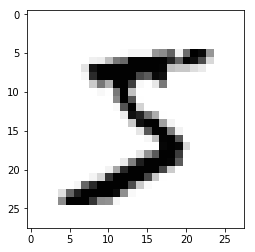

In [27]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
